## Digit Recognition (Nhận dạng chữ viết tay)

## 1. Bài toán

### Đề bài

Với bộ dữ liệu được cho đã được rút trích đặt trưng thành các vector đặc trưng và được gán nhãn, hãy đi xây dựng mô hình sao cho với mỗi ảnh input đầu vào (vector đặc trưng mới) thì cho ra được chữ số nằm trong ảnh.

![Digit recognition](https://nextjournal.com/data/QmX8QN5JuvZdGZ7nczmzB1z3xMDMeWqyLQ82MTx8nU6U2n?content-type=image%2Fsvg%2Bxml)

### Mô tả dữ liệu

Dữ liệu của cuộc thi là tập dữ liệu ảnh thang màu xám, tức là mỗi một pixel có giá trị nằm trong đoạn từ 0 đến 255. kích thước của mỗi ảnh đều là 28 x 28 pixels.

Gồm hai phần là tập huấn luyện và tập kiểm thử được lưu tương ứng trong hai file là `train.csv` và `test.csv`.

- Về dữ liệu huấn luyện: 
    - Được chứa trong file có tên là train.csv, bên trong có 29400 dòng *(hồi sau sẽ rõ)*, mỗi dòng có 785 cột *(hồi sau sẽ rõ)*, ở dòng thứ `i`, cột đầu tiên ứng với nhãn của ảnh thứ `i` tức là chữ số được gán nhãn cho ảnh thứ `i`, 784 cột còn lại là các giá trị bên trong vector đặc trưng hay nói chính xác hơn là hình dạng của bức ảnh sau khi được `duỗi thẳng`.
- Về dữ liệu kiểm thử:
    - Được chứa trong file test.csv, bên trong có 12600 dòng *(hồi sau sẽ rõ)*, mỗi dòng có 784 cột, biểu diễn cho các giá trị đặc trưng của vector đặc trưng cho mỗi một ảnh đầu vào và đương nhiên là chưa được gán nhãn.
    
    
**Nhiệm vụ của chúng ta là xây dựng mô hình để từ tập dữ liệu huấn luyện training set, tạo ra một mô hình có khả năng điền vào file text.csv nhãn của các vector đặc trưng một cách chính xác nhất có thể.**

## 2. Tiến hành xử lý bài toán

Bài toán nhận diễn chữ viết tay là một bài toán Machine Learning, cụ thể hơn nữa là bài toán Supervised Learning (từ một tập dữ liệu cho trước đã được gán nhãn, đi xây dựng mô hình sau cho với mỗi điểm dữ liệu đầu vào ta dựa đoán được giá trị đầu ra tương ứng).

Chúng ta sẽ dựa theo flow làm việc với Machine Learning để tiến hành giải quyết bài toán

![Flow woring in Machine Learning](https://i.pinimg.com/originals/c0/c5/ca/c0c5caf00c10a5dec3d690017ca19c77.png)

### Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### Chuẩn bị dữ liệu

In [2]:
data = pd.read_csv("train.csv")

***Chú ý***: *Do dữ liệu đầu vào của chúng ta đã là vector đặc trưng sau khi đã được rút trích nên chúng ta không cần phải quay lại bước tiền xử lý dữ liệu.*

#### Kiểm tra một số tính chất của tập dữ liệu

In [3]:
# Xem số kích thước bộ dữ liệu
print("Kich thuoc bo du lieu huan luyen la: ", len(data))

# Xem các đặc trưng
print(data.columns)

Kich thuoc bo du lieu huan luyen la:  29400
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


#### Xem dữ liệu huấn luyên có tính cân bằng không

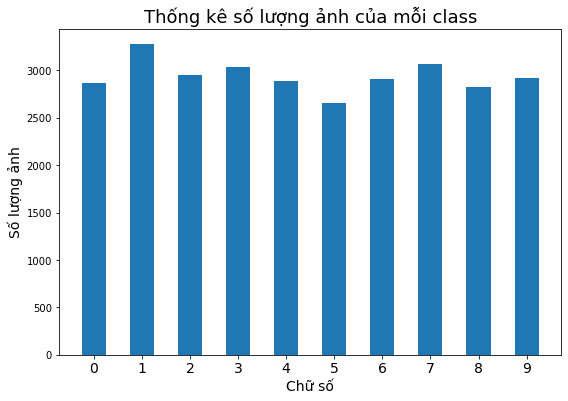

In [53]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
counts = [0, 0, 0, 0, 0 ,0 , 0 , 0, 0, 0]

for i in range(0, len(data)):
    index = data['label'].values[i]
    counts[index] += 1
    
fig, ax = plt.subplots(figsize=(9,6))

ax.bar(digits, counts, width=0.5)

ax.set_title('Thống kê số lượng ảnh của mỗi class', fontsize=18)
ax.set_xlabel('Chữ số', fontsize=14)
ax.set_ylabel('Số lượng ảnh', fontsize=14)

plt.xticks(digits, fontsize=14)

plt.show()

Khá là cân bằng rồi các bạn nhỉ !

#### Chia dữ liệu huấn luyện

In [ ]:
percent_train = 1.0
len_train = int(len(data)*percent_train)

label = np.array(data['label'][0:len_train])
vector = np.array(data.iloc[:len_train,1:])

test_label = np.array(data['label'][len_train:])
test_vector = np.array(data.iloc[len_train:,1:])

### Xây dựng mô hình (Chọn thuật toán huấn luyện)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# chọn randomforest các tham số tùy chỉnh...
clf2 = RandomForestClassifier(max_depth=15)
clf2.fit(vector, label)

# Chọn độ đo cho bài toán
clf2.score(vector, label)

***Chú ý***: *Bước này có thể lặp lại nhiều lần khi mà accuracy không cao hay chưa đạt yêu cầu đặt ra, vì vậy chọn ra thuật toán để huấn luyện là một vấn đề.*

### Kiểm thử mô hình

In [ ]:
# đọc dữ liệu từ tập test
data2 = pd.read_csv("test.csv")
vector2 = np.array(data2.iloc[:,:])

#predict = model lúc nãy.
kq = np.array(clf2.predict(vector2))

#### Ghi lại kết quả của bài toán

In [ ]:
#thêm row đầu tiên chứa tên cột là ImangeID và Label
df = pd.DataFrame(columns=['ImageId','Label'])

#Duyệt dữ kết quả và ghi vào df

for i,v in enumerate(kq):
  df = df.append({'ImageId':i+1,'Label':v}, ignore_index=True)

# ghi file rồi sub thôi :D 
df.to_csv('final.csv',index = False)

## 3. Submit và một vài cảm nhận

### Kết quả submit 

### Tóm tắt phần thi của mình